<a href="https://colab.research.google.com/github/mahidhiman12/Deep_learning_with_PyTorch/blob/main/make_custom_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. PyTorch Custom Data Creation from Food101

In [14]:
import torch
import torchvision

import torchvision.datasets as datasets
import torchvision.transforms as transforms
import pathlib


In [15]:
from os.path import isdir
# setup data directory
data_dir = pathlib.Path("Data/")
image_dir = data_dir / "food101"


if image_dir.is_dir():
  print(f"{image_dir} directory already exists .. skipping download")
else:
  print(f"Did not find {image_dir} directory, creating one...")
  image_dir.mkdir(parents=True, exist_ok=True)


Data/food101 directory already exists .. skipping download


In [13]:
train_data = datasets.Food101(root=data_dir,
                              split="train",
                              download = True)
test_data = datasets.Food101(root=data_dir,
                              split="test",
                              download = True)

In [25]:
class_names = train_data.classes
class_names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

train_data[0][0] → that’s the image itself (as a tensor).

train_data[0][1] → that’s the label (like an integer, e.g. 0, 1, 2).

churros


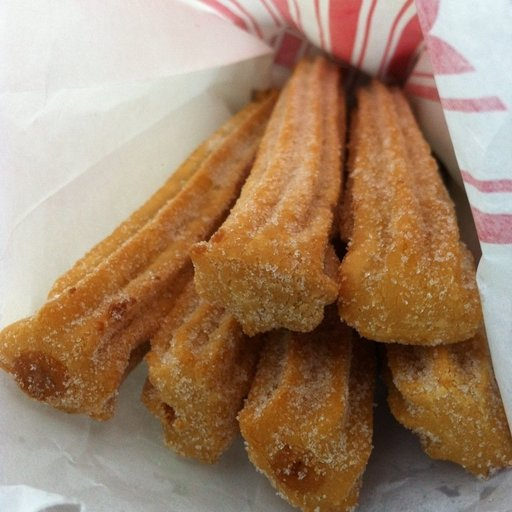

In [24]:
print(class_names[train_data[1][1]])
train_data[1][0]

In [35]:
import random

data_path = data_dir / "food-101" / "images"
target_classes = ["ice_cream" , "pancakes" , "ramen" , "nachos"]

amount_to_get = 0.2

# create a function to separate random amount of data
def get_subset(image_path=data_path,
               data_splits=["train", "test"],
               target_classes=["ice_cream", "pancakes", "ramen", "nachos"],
               amount=0.1,
               seed=42):

    random.seed(seed)
    label_splits = {}

    for data_split in data_splits:
        print(f"[INFO] Creating image split for: {data_split}...")

        label_path = data_dir / "food-101" / "meta" / f"{data_split}.txt"

        with open(label_path, "r") as f:
            labels = [line.strip() for line in f.readlines() if line.split("/")[0] in target_classes]

        number_to_sample = round(amount * len(labels))
        print(f"[INFO] Getting random subset of {number_to_sample} images for {data_split}...")

        sampled_images = random.sample(labels, k=number_to_sample)
        image_paths = [image_path / f"{sample_image}.jpg" for sample_image in sampled_images]
        label_splits[data_split] = image_paths

    return label_splits
label_splits = get_subset(amount=amount_to_get)
label_splits["train"][:10]


[INFO] Creating image split for: train...
[INFO] Getting random subset of 600 images for train...
[INFO] Creating image split for: test...
[INFO] Getting random subset of 200 images for test...


[PosixPath('Data/food-101/images/ramen/2818546.jpg'),
 PosixPath('Data/food-101/images/ice_cream/3177785.jpg'),
 PosixPath('Data/food-101/images/ice_cream/1639310.jpg'),
 PosixPath('Data/food-101/images/nachos/28282.jpg'),
 PosixPath('Data/food-101/images/nachos/226238.jpg'),
 PosixPath('Data/food-101/images/nachos/1817818.jpg'),
 PosixPath('Data/food-101/images/ice_cream/3845977.jpg'),
 PosixPath('Data/food-101/images/ice_cream/2960932.jpg'),
 PosixPath('Data/food-101/images/ramen/3536305.jpg'),
 PosixPath('Data/food-101/images/pancakes/925421.jpg')]

## Move training and testing images to dedicated folders

In [36]:
# Create target directory path
target_dir_name = f"Data/ic_pancake_ramen_nachos{str(int(amount_to_get*100))}_percent"
print(f"Creating directory: '{target_dir_name}'")

target_dir = pathlib.Path(target_dir_name)

target_dir.mkdir(parents = True , exist_ok=True)

Creating directory: 'Data/ic_pancake_ramen_nachos20_percent'


In [37]:
import shutil

for image_split in label_splits.keys():
    for image_path in label_splits[str(image_split)]:
        dest_dir = target_dir / image_split / image_path.parent.stem / image_path.name
        if not dest_dir.parent.is_dir():
            dest_dir.parent.mkdir(parents=True, exist_ok=True)
        print(f"[INFO] Copying {image_path} to {dest_dir}...")
        shutil.copy2(image_path, dest_dir)

[INFO] Copying Data/food-101/images/ramen/2818546.jpg to Data/ic_pancake_ramen_nachos20_percent/train/ramen/2818546.jpg...
[INFO] Copying Data/food-101/images/ice_cream/3177785.jpg to Data/ic_pancake_ramen_nachos20_percent/train/ice_cream/3177785.jpg...
[INFO] Copying Data/food-101/images/ice_cream/1639310.jpg to Data/ic_pancake_ramen_nachos20_percent/train/ice_cream/1639310.jpg...
[INFO] Copying Data/food-101/images/nachos/28282.jpg to Data/ic_pancake_ramen_nachos20_percent/train/nachos/28282.jpg...
[INFO] Copying Data/food-101/images/nachos/226238.jpg to Data/ic_pancake_ramen_nachos20_percent/train/nachos/226238.jpg...
[INFO] Copying Data/food-101/images/nachos/1817818.jpg to Data/ic_pancake_ramen_nachos20_percent/train/nachos/1817818.jpg...
[INFO] Copying Data/food-101/images/ice_cream/3845977.jpg to Data/ic_pancake_ramen_nachos20_percent/train/ice_cream/3845977.jpg...
[INFO] Copying Data/food-101/images/ice_cream/2960932.jpg to Data/ic_pancake_ramen_nachos20_percent/train/ice_cream


## Zip up images folder to be more easily transported

In [38]:
zip_file_name = data_dir / f"ic_pancake_ramen_nachos{str(int(amount_to_get*100))}_percent"
shutil.make_archive(zip_file_name,
                    format="zip",
                    root_dir=target_dir)

'/content/Data/ic_pancake_ramen_nachos20_percent.zip'

In [40]:

!ls -la Data/

total 4918864
drwxr-xr-x 5 root root       4096 Oct 16 12:25 .
drwxr-xr-x 1 root root       4096 Oct 16 12:11 ..
drwxr-xr-x 4 3156  320       4096 Jul  9  2014 food-101
drwxr-xr-x 2 root root       4096 Oct 16 11:31 food101
-rw-r--r-- 1 root root 4996278331 Oct 16 11:45 food-101.tar.gz
drwxr-xr-x 4 root root       4096 Oct 16 12:20 ic_pancake_ramen_nachos20_percent
-rw-r--r-- 1 root root   40607787 Oct 16 12:25 ic_pancake_ramen_nachos20_percent.zip


In [41]:

!mkdir -p ic_pancake_ramen_nachos
!unzip Data/ic_pancake_ramen_nachos20_percent.zip -d ic_pancake_ramen_nachos

Archive:  Data/ic_pancake_ramen_nachos20_percent.zip
   creating: ic_pancake_ramen_nachos/test/
   creating: ic_pancake_ramen_nachos/train/
   creating: ic_pancake_ramen_nachos/train/ice_cream/
   creating: ic_pancake_ramen_nachos/train/nachos/
   creating: ic_pancake_ramen_nachos/train/pancakes/
   creating: ic_pancake_ramen_nachos/train/ramen/
  inflating: ic_pancake_ramen_nachos/train/ice_cream/3623126.jpg  
  inflating: ic_pancake_ramen_nachos/train/ice_cream/1436400.jpg  
  inflating: ic_pancake_ramen_nachos/train/ice_cream/3730391.jpg  
  inflating: ic_pancake_ramen_nachos/train/ice_cream/1905911.jpg  
  inflating: ic_pancake_ramen_nachos/train/ice_cream/3136770.jpg  
  inflating: ic_pancake_ramen_nachos/train/ice_cream/424908.jpg  
  inflating: ic_pancake_ramen_nachos/train/ice_cream/534544.jpg  
  inflating: ic_pancake_ramen_nachos/train/ice_cream/69414.jpg  
  inflating: ic_pancake_ramen_nachos/train/ice_cream/3400004.jpg  
  inflating: ic_pancake_ramen_nachos/train/ice_cream/

In [42]:

# Remove extra data
import os
os.remove("ic_pancake_ramen_nachos")
shutil.rmtree("ic_pancake_ramen_nachos")

IsADirectoryError: [Errno 21] Is a directory: 'ic_pancake_ramen_nachos'

In [43]:
!ls

Data  ic_pancake_ramen_nachos  sample_data
